In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df= pd.read_csv('Housing_data.csv')

In [3]:
df.shape

(1047, 7)

In [4]:
df.head()

,Price,LivingArea,Bathrooms,Bedrooms,LotSize,Age,Fireplace
0,16858,1629,1.0,3,0.76,180,0
1,26049,1344,2.0,3,0.92,13,0
2,26130,822,1.0,2,0.56,173,0
3,31113,1540,1.0,2,0.04,115,0
4,40932,1320,1.0,3,0.17,90,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1047 entries, 0 to 1046
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Price       1047 non-null   int64  
 1   LivingArea  1047 non-null   int64  
 2   Bathrooms   1047 non-null   float64
 3   Bedrooms    1047 non-null   int64  
 4   LotSize     1047 non-null   float64
 5   Age         1047 non-null   int64  
 6   Fireplace   1047 non-null   int64  
dtypes: float64(2), int64(5)
memory usage: 57.4 KB


In [6]:
### missing_values
df.isnull().sum()

Price         0
LivingArea    0
Bathrooms     0
Bedrooms      0
LotSize       0
Age           0
Fireplace     0
dtype: int64

In [7]:
#### checking duplicates
df.duplicated().sum()

np.int64(12)

In [8]:
df.drop_duplicates(inplace=True,ignore_index=True)

In [9]:
df.duplicated().sum()

np.int64(0)

<Axes: >

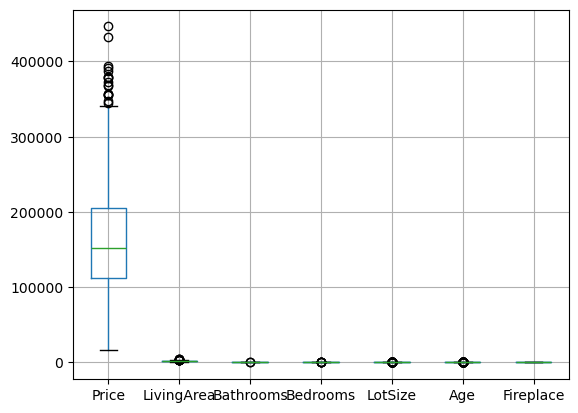

In [10]:
### Outlier Detection
df.boxplot()

In [14]:
### outlier capping
def outlier_capping(df,column):
    Q1= df[column].quantile(0.25)
    Q3= df[column].quantile(0.75)
    IQR= Q3-Q1
    lower_extreme= Q1-1.5*IQR
    upper_extreme= Q3+1.5*IQR
    df[column]= df[column].apply(lambda x: lower_extreme if x<lower_extreme else upper_extreme if x>upper_extreme else x)
for col in df.select_dtypes(['int','float']).columns:
    outlier_capping(df,col)

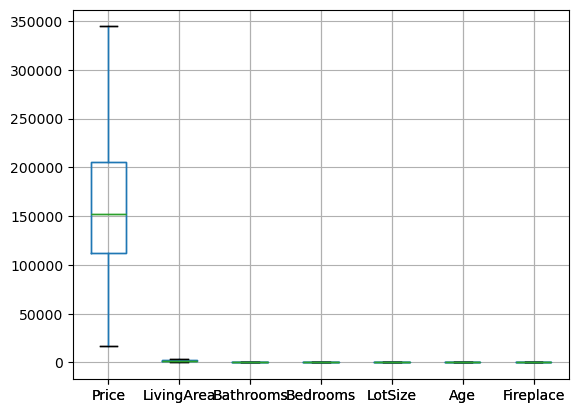

In [16]:
df.boxplot()
plt.show()

In [17]:
### Feature selection

In [18]:
df.head()

,Price,LivingArea,Bathrooms,Bedrooms,LotSize,Age,Fireplace
0,16858.0,1629.0,1.0,3.0,0.76,75.25,0
1,26049.0,1344.0,2.0,3.0,0.92,13.00,0
2,26130.0,822.0,1.0,2.0,0.56,75.25,0
3,31113.0,1540.0,1.0,2.0,0.04,75.25,0
4,40932.0,1320.0,1.0,3.0,0.17,75.25,0


In [21]:
corr=df.corr()
import seaborn as sns

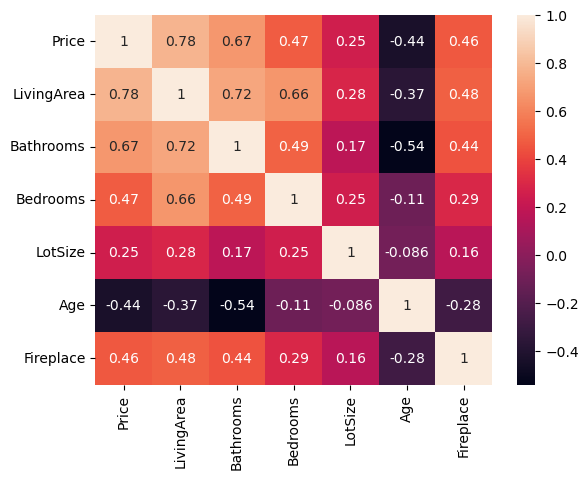

In [24]:
sns.heatmap(corr,annot=True)
plt.show()

In [25]:
#### f_regression
from sklearn.feature_selection import f_regression

In [26]:
target= df[['Price']]
features= df.drop(columns=['Price'])

In [30]:
f_reg=f_regression(features,target)

In [39]:
features.columns

Index(['LivingArea', 'Bathrooms', 'Bedrooms', 'LotSize', 'Age', 'Fireplace'], dtype='object')

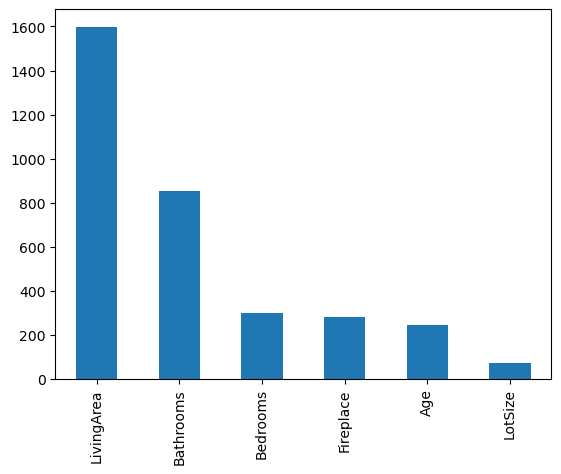

In [38]:
pd.Series(f_reg[0],index=features.columns).sort_values(ascending=False).plot(kind='bar')
plt.show()

In [41]:
1/(1-0.099)

1.1098779134295227

In [44]:
#### VIF-- Check Multicolinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [57]:
features.columns

Index(['LivingArea', 'Bathrooms', 'Bedrooms', 'LotSize', 'Age', 'Fireplace'], dtype='object')

In [56]:
features.values

array([[1.629e+03, 1.000e+00, 3.000e+00, 7.600e-01, 7.525e+01, 0.000e+00],
       [1.344e+03, 2.000e+00, 3.000e+00, 9.200e-01, 1.300e+01, 0.000e+00],
       [8.220e+02, 1.000e+00, 2.000e+00, 5.600e-01, 7.525e+01, 0.000e+00],
       ...,
       [3.361e+03, 3.500e+00, 4.000e+00, 7.100e-01, 1.000e+00, 1.000e+00],
       [3.250e+03, 2.500e+00, 3.000e+00, 5.300e-01, 2.300e+01, 1.000e+00],
       [3.467e+03, 2.500e+00, 4.000e+00, 3.400e-01, 3.000e+00, 1.000e+00]])

In [45]:
vif= pd.DataFrame()

In [51]:
vif['features']= features.columns
vif['VIF']= [variance_inflation_factor(features.values,i) for i in range(len(features.columns))]

In [58]:
vif.sort_values(by='VIF',ascending=False)

,features,VIF
2,Bedrooms,29.100456
0,LivingArea,28.393716
1,Bathrooms,21.617158
3,LotSize,3.345417
5,Fireplace,3.304989
4,Age,2.471556


In [59]:
features.head()

,LivingArea,Bathrooms,Bedrooms,LotSize,Age,Fireplace
0,1629.0,1.0,3.0,0.76,75.25,0
1,1344.0,2.0,3.0,0.92,13.00,0
2,822.0,1.0,2.0,0.56,75.25,0
3,1540.0,1.0,2.0,0.04,75.25,0
4,1320.0,1.0,3.0,0.17,75.25,0


In [61]:
#### Scaling and Labeling
from sklearn.preprocessing import StandardScaler,MinMaxScaler,RobustScaler,OneHotEncoder,OrdinalEncoder, LabelEncoder

In [64]:
std_sca=StandardScaler()
min_max= MinMaxScaler()
rob_sca= RobustScaler()

In [69]:
features.head()

,LivingArea,Bathrooms,Bedrooms,LotSize,Age,Fireplace
0,-0.277590,1.0,3.0,0.937235,2.258368,0
1,-0.730058,2.0,3.0,1.437239,-0.488931,0
2,-1.558790,1.0,2.0,0.312231,2.258368,0
3,-0.418887,1.0,2.0,-1.312782,2.258368,0
4,-0.768161,1.0,3.0,-0.906529,2.258368,0


In [68]:
features[['LivingArea','LotSize','Age']]=std_sca.fit_transform(features[['LivingArea','LotSize','Age']])

In [65]:
min_max.fit_transform(features[['LivingArea','LotSize','Age']])

array([[0.33783426, 0.64135021, 1.        ],
       [0.23722531, 0.77637131, 0.17275748],
       [0.05295208, 0.47257384, 1.        ],
       ...,
       [0.94925426, 0.59915612, 0.01328904],
       [0.91006972, 0.44725738, 0.30564784],
       [0.98667373, 0.28691983, 0.03986711]])

In [66]:
rob_sca.fit_transform(features[['LivingArea','LotSize','Age']])

array([[-0.05072046,  0.94871795,  2.08181818],
       [-0.37925072,  1.35897436, -0.18181818],
       [-0.98097983,  0.43589744,  2.08181818],
       ...,
       [ 1.94582133,  0.82051282, -0.61818182],
       [ 1.81786744,  0.35897436,  0.18181818],
       [ 2.06801153, -0.12820513, -0.54545455]])

In [71]:
#### Labeling
dict1={'Gender':['Male','Female','Male','Female','Female','Male'],
                 'Qualification':['Bachelors','Bachelors','Masters','Doctorate','Masters','Diploma']}

In [77]:
df= pd.DataFrame(dict1)
ord_enc=OrdinalEncoder(categories=[['Diploma','Bachelors','Masters','Doctorate']])
df[['Qualification']]=ord_enc.fit_transform(df[['Qualification']])

In [80]:
df=pd.get_dummies(df,dtype='int')

In [81]:
df

,Qualification,Gender_Female,Gender_Male
0,1.0,0,1
1,1.0,1,0
2,2.0,0,1
3,3.0,1,0
4,2.0,1,0
5,0.0,0,1
